In [17]:
import numpy
from cil.utilities import dataexample
from cil.utilities.display import show2D
from cil.framework import AcquisitionData
from cil.processors import TransmissionAbsorptionConverter, RingRemover
from cil.plugins.astra import FBP
from matplotlib import pyplot as plt
### AlgoTom comparisons
import algotom.prep.removal as rem

In [18]:
def add_bad_pixels(data, number_of_columns, number_of_hot_pix, seed):

    data_corrupted = data.copy()

    low = 0.3*numpy.amin(data.as_array())
    high = 0.3*numpy.amax(data.as_array())

    rng = numpy.random.RandomState(seed=seed) 
    columns = rng.randint(0, data.shape[1], size=number_of_columns)
    pix_row = rng.randint(0, data.shape[0], size=number_of_hot_pix)
    pix_col = rng.randint(0, data.shape[1], size=number_of_hot_pix)
    pixel_values = rng.uniform(low=low, high=high, size=number_of_hot_pix)

    for i in range(number_of_columns):
        col_pattern = rng.uniform(low=low, high=high, size=data.shape[0])
        data_corrupted.as_array()[:, columns[i]] = data.as_array()[:, columns[i]]+col_pattern

    for i in range(number_of_hot_pix):
        data_corrupted.as_array()[pix_row[i], pix_col[i]] = pixel_values[i]

    return data_corrupted 

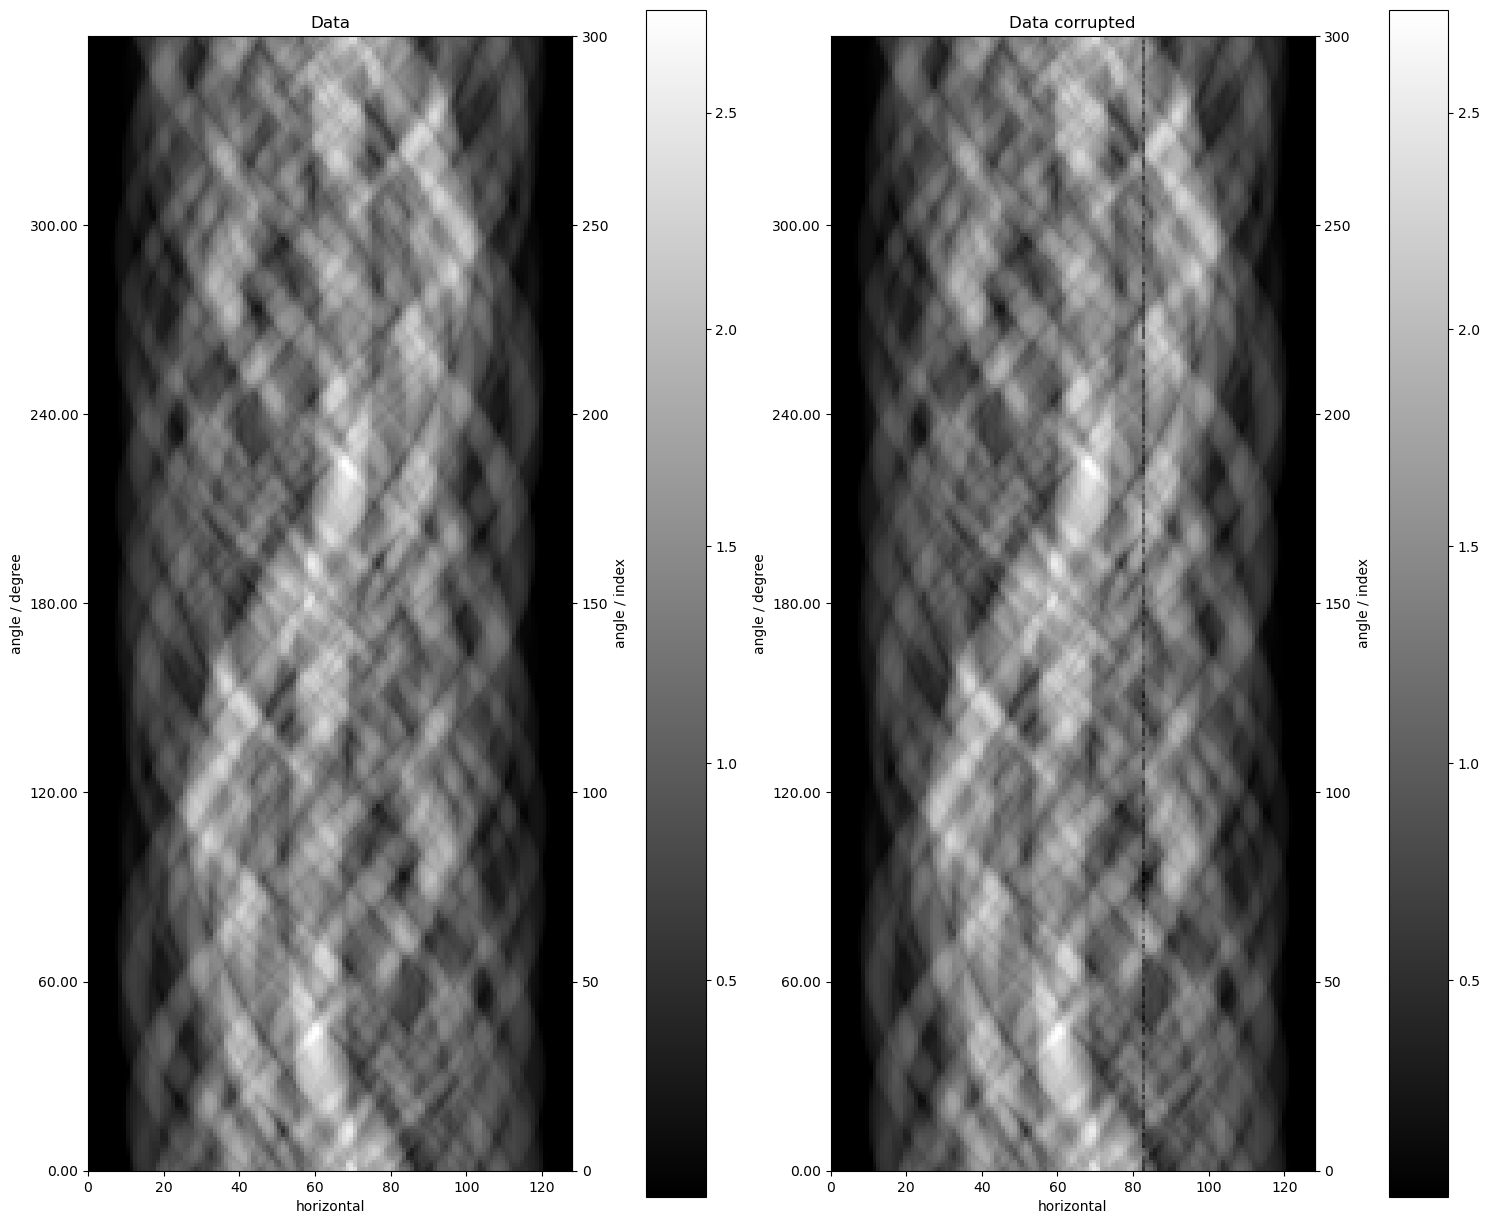

In [19]:
data_raw = dataexample.SIMULATED_PARALLEL_BEAM_DATA.get()
data_slice = data_raw.get_slice(vertical=80)
data_corrupted = add_bad_pixels(data_slice, 1, 1, 1312)
data_corrupted = TransmissionAbsorptionConverter()(data_corrupted)
data_slice = TransmissionAbsorptionConverter()(data_slice)

show2D([data_slice, data_corrupted], title=['Data','Data corrupted'])

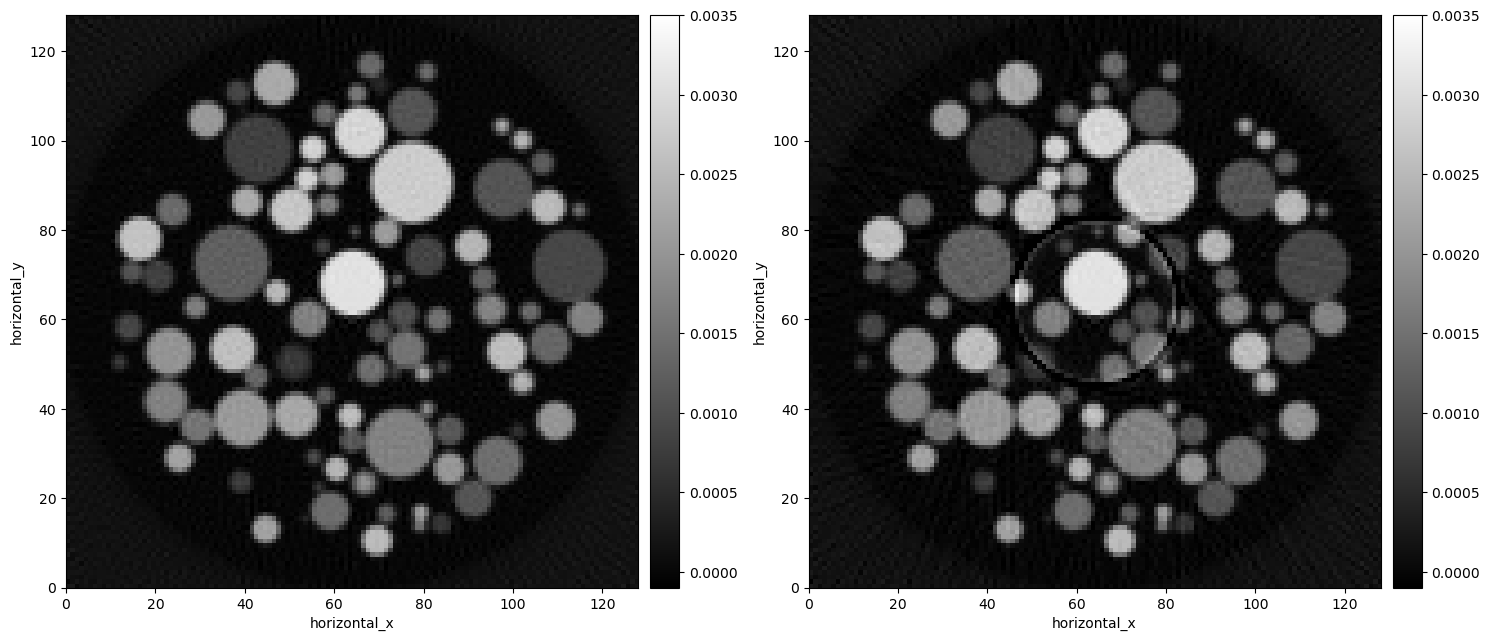

In [20]:
ag = data_slice.geometry
ig = ag.get_ImageGeometry()

fbp_recon = FBP(ig, ag, device='gpu')(data_slice)
fbp_recon_corrupted = FBP(ig, ag, device='gpu')(data_corrupted)

show2D([fbp_recon, fbp_recon_corrupted],num_cols=2,  cmap='grey', fix_range=(-0.0001,0.0035))


##### CIL ring remover

Strength of ring removal -> L

'Fineness' of filter used for correction -> sigma and dB

Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover


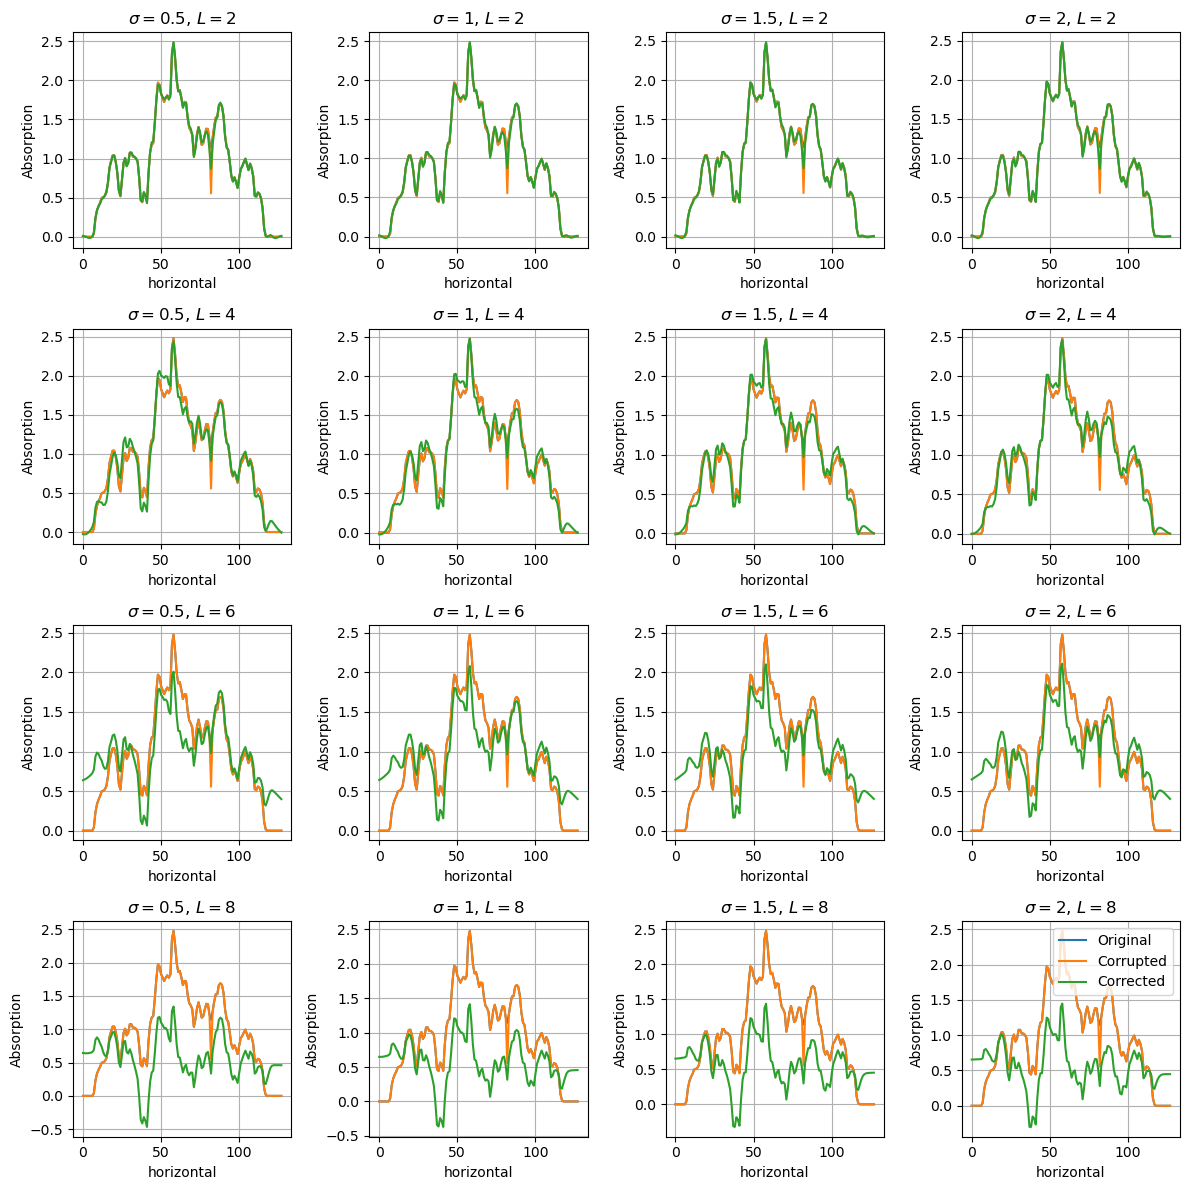

In [21]:
fig, axs = plt.subplots(4,4, figsize=(12,12))

sigmas = [0.5, 1, 1.5, 2]
decompositions = [2, 4, 6, 8]

for i in numpy.arange(len(decompositions)):
    for j in numpy.arange(len(sigmas)):

        r = RingRemover(decompositions[i],'db20', sigmas[j])
        r.set_input(data_corrupted)
        data_corrected = r.get_output()
        ax = axs[i,j]
        ax.plot(data_slice.array[150,:])
        ax.plot(data_corrupted.array[150,:])
        ax.plot(data_corrected.array[150,:])
        
        ax.set_title('$\sigma = $' + str(sigmas[j]) + ', $L = $' + str(decompositions[i]))
        ax.set_xlabel('horizontal')
        ax.set_ylabel('Absorption')
        ax.grid()
ax.legend(['Original','Corrupted','Corrected'])
plt.tight_layout()

In [22]:
fig, axs = plt.subplots(4,4, figsize=(12,12))

sigmas = [0.5, 1, 1.5, 2]
decompositions = [2, 4, 6, 8]
wavelet_types = ['db1', 'db10', 'db20', 'db30']

for i in numpy.arange(len(decompositions)):
    for j in numpy.arange(len(wavelet_types)):

        r = RingRemover(decompositions[i],wavelet_types[j], 1.5)
        r.set_input(data_corrupted)
        data_corrected = r.get_output()
        ax = axs[i,j]
        ax.plot(data_slice.array[150,:])
        ax.plot(data_corrupted.array[150,:])
        ax.plot(data_corrected.array[150,:])
        
        ax.set_title('$\sigma = $1.5, wavelet type =' + wavelet_types[j] + ', $L = $' + str(decompositions[i]))
        ax.set_xlabel('horizontal')
        ax.set_ylabel('Absorption')
        ax.grid()
ax.legend(['Original','Corrupted','Corrected'])
plt.tight_layout()

Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover


Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover
Finish Ring Remover


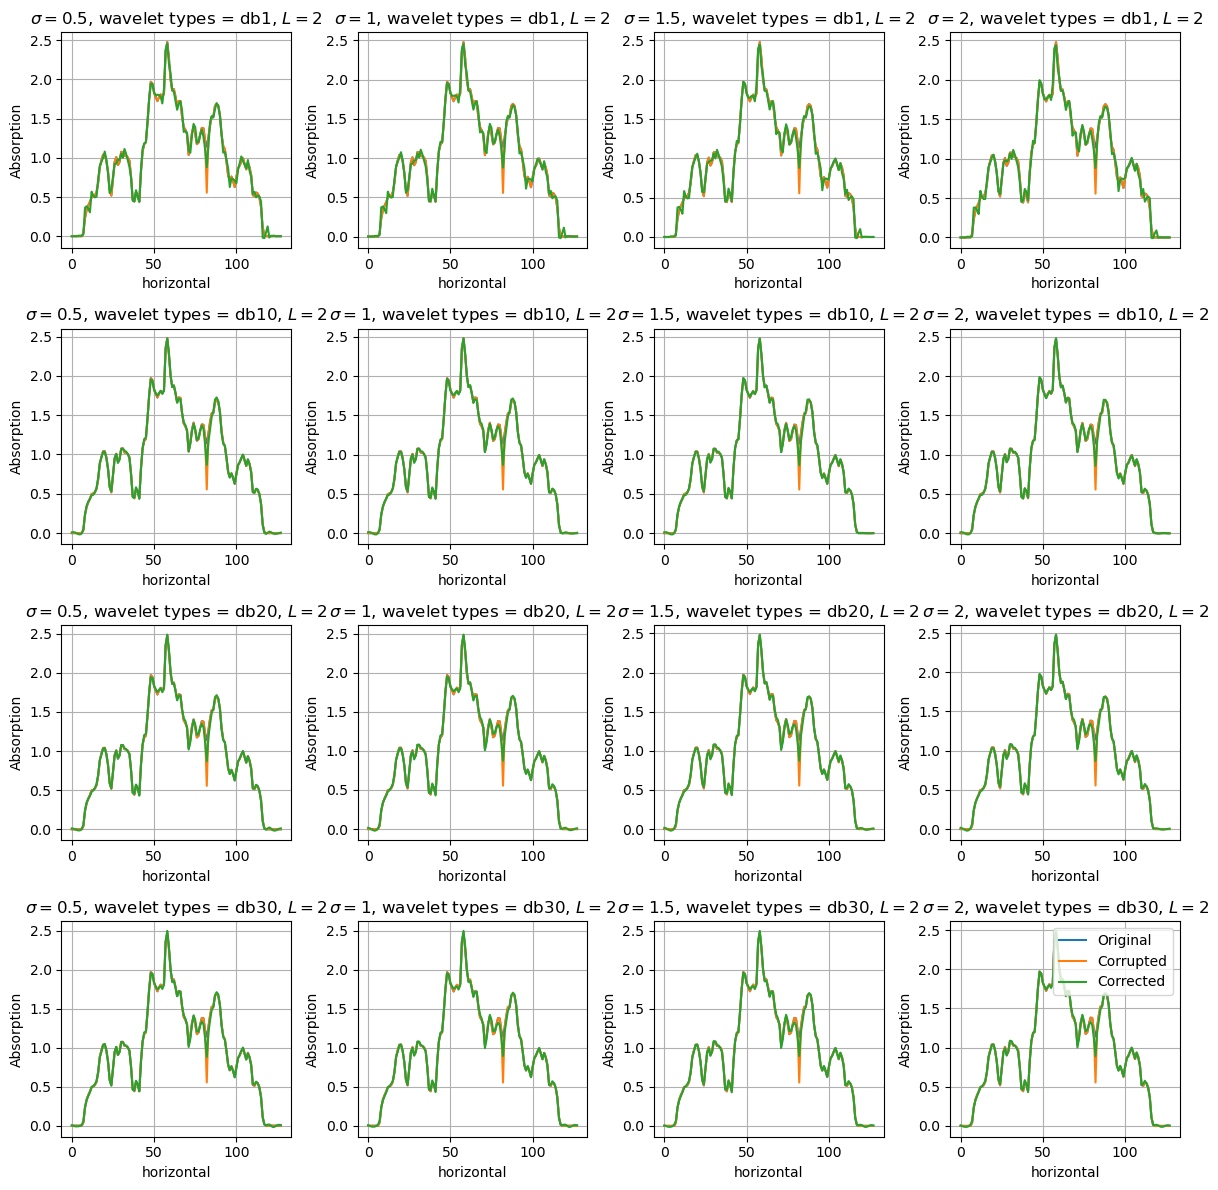

In [ ]:
fig, axs = plt.subplots(4,4, figsize=(12,12))

sigmas = [0.5, 1, 1.5, 2]
decompositions = [2, 4, 6, 8]

for i in numpy.arange(len(wavelet_types)):
    for j in numpy.arange(len(sigmas)):

        r = RingRemover(2, wavelet_types[i], sigmas[j])
        r.set_input(data_corrupted)
        data_corrected = r.get_output()
        ax = axs[i,j]
        ax.plot(data_slice.array[150,:])
        ax.plot(data_corrupted.array[150,:])
        ax.plot(data_corrected.array[150,:])
        
        ax.set_title('$\sigma = $' + str(sigmas[j]) + ', wavelet types = ' + wavelet_types[i] + ', $L = 2$' )
        ax.set_xlabel('horizontal')
        ax.set_ylabel('Absorption')
        ax.grid()
ax.legend(['Original','Corrupted','Corrected'])
plt.tight_layout()

Finish Ring Remover


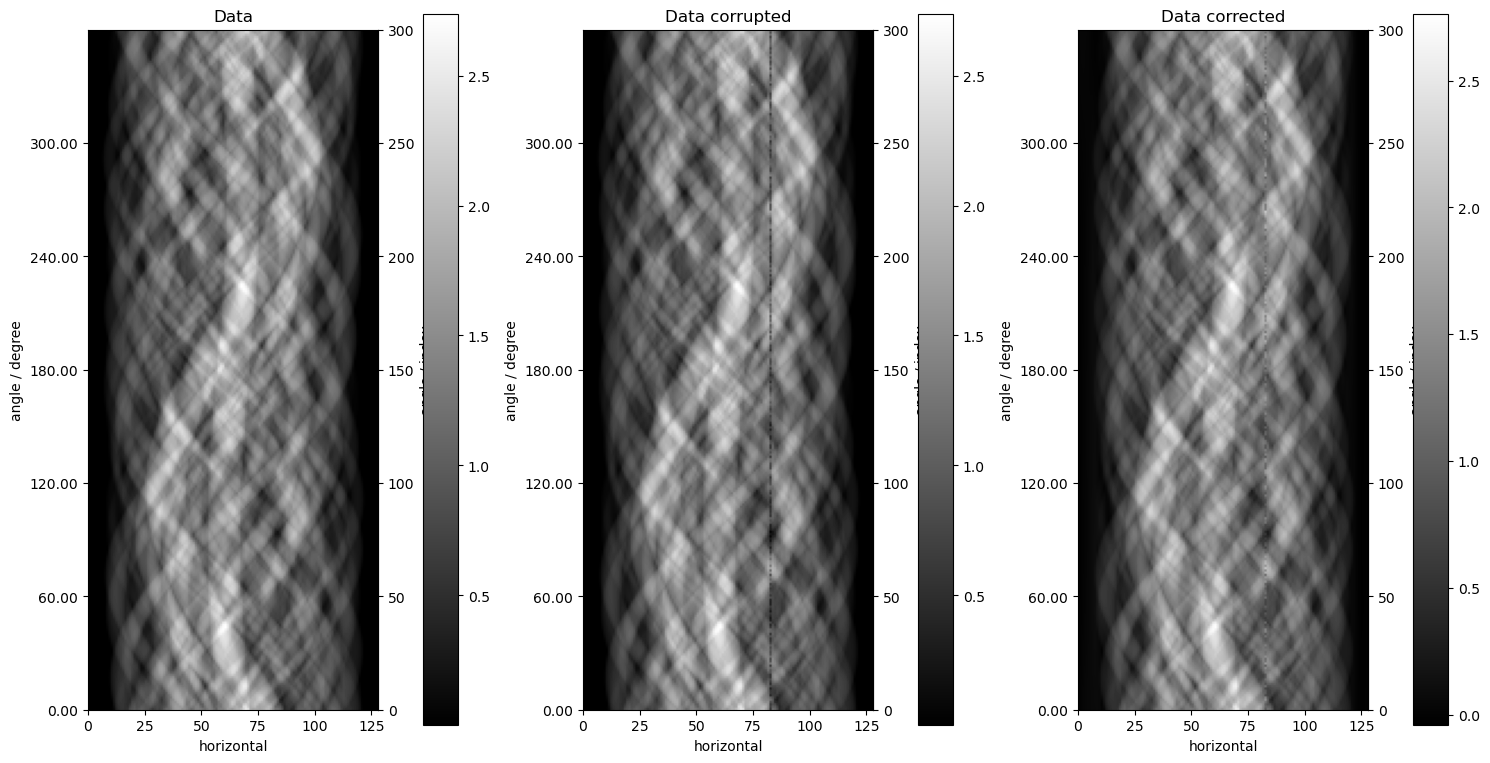

In [ ]:
r = RingRemover(3,'db20', 2)

r.set_input(data_corrupted)
data_corrected = r.get_output()
show2D([data_slice, data_corrupted, data_corrected], num_cols=3, title=['Data','Data corrupted', 'Data corrected'])

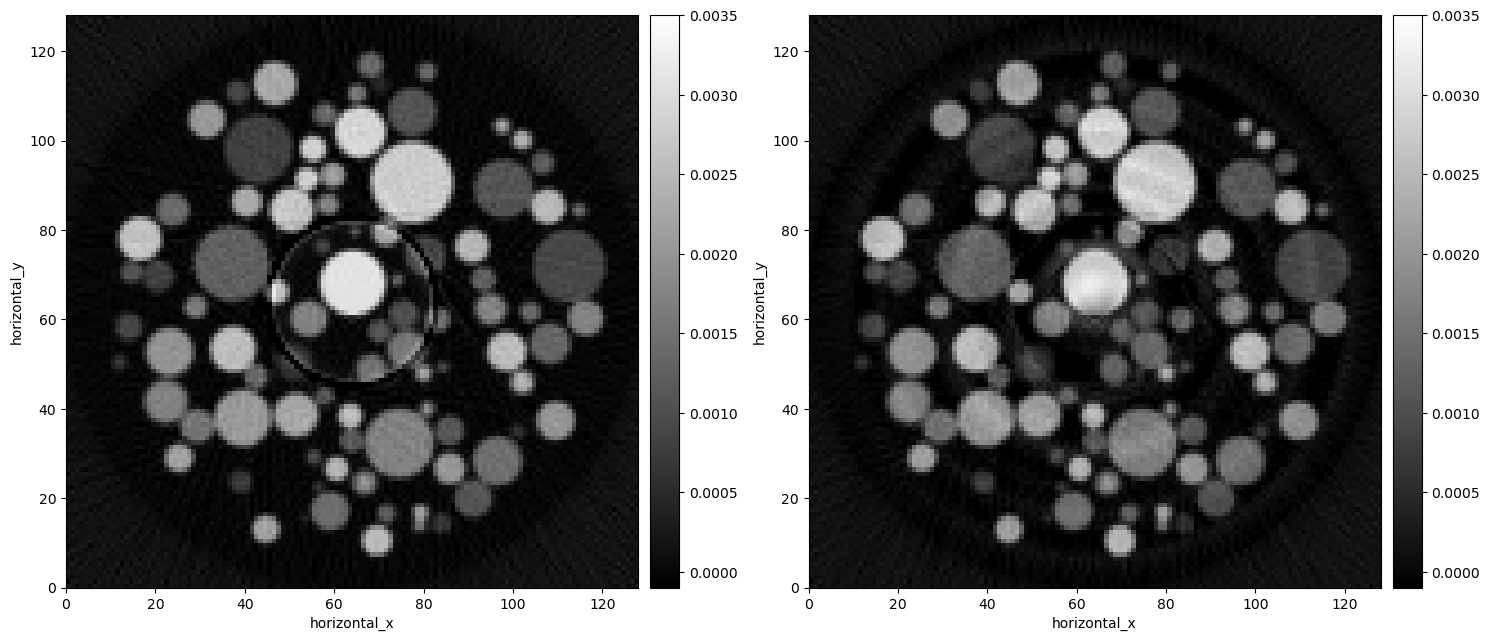

In [ ]:
fbp_recon_corrected = FBP(ig, ag, device='gpu')(data_corrected)
show2D([fbp_recon_corrupted, fbp_recon_corrected],num_cols=2,  cmap='grey', fix_range=(-0.0001,0.0035))


##### Using algotom remove all 

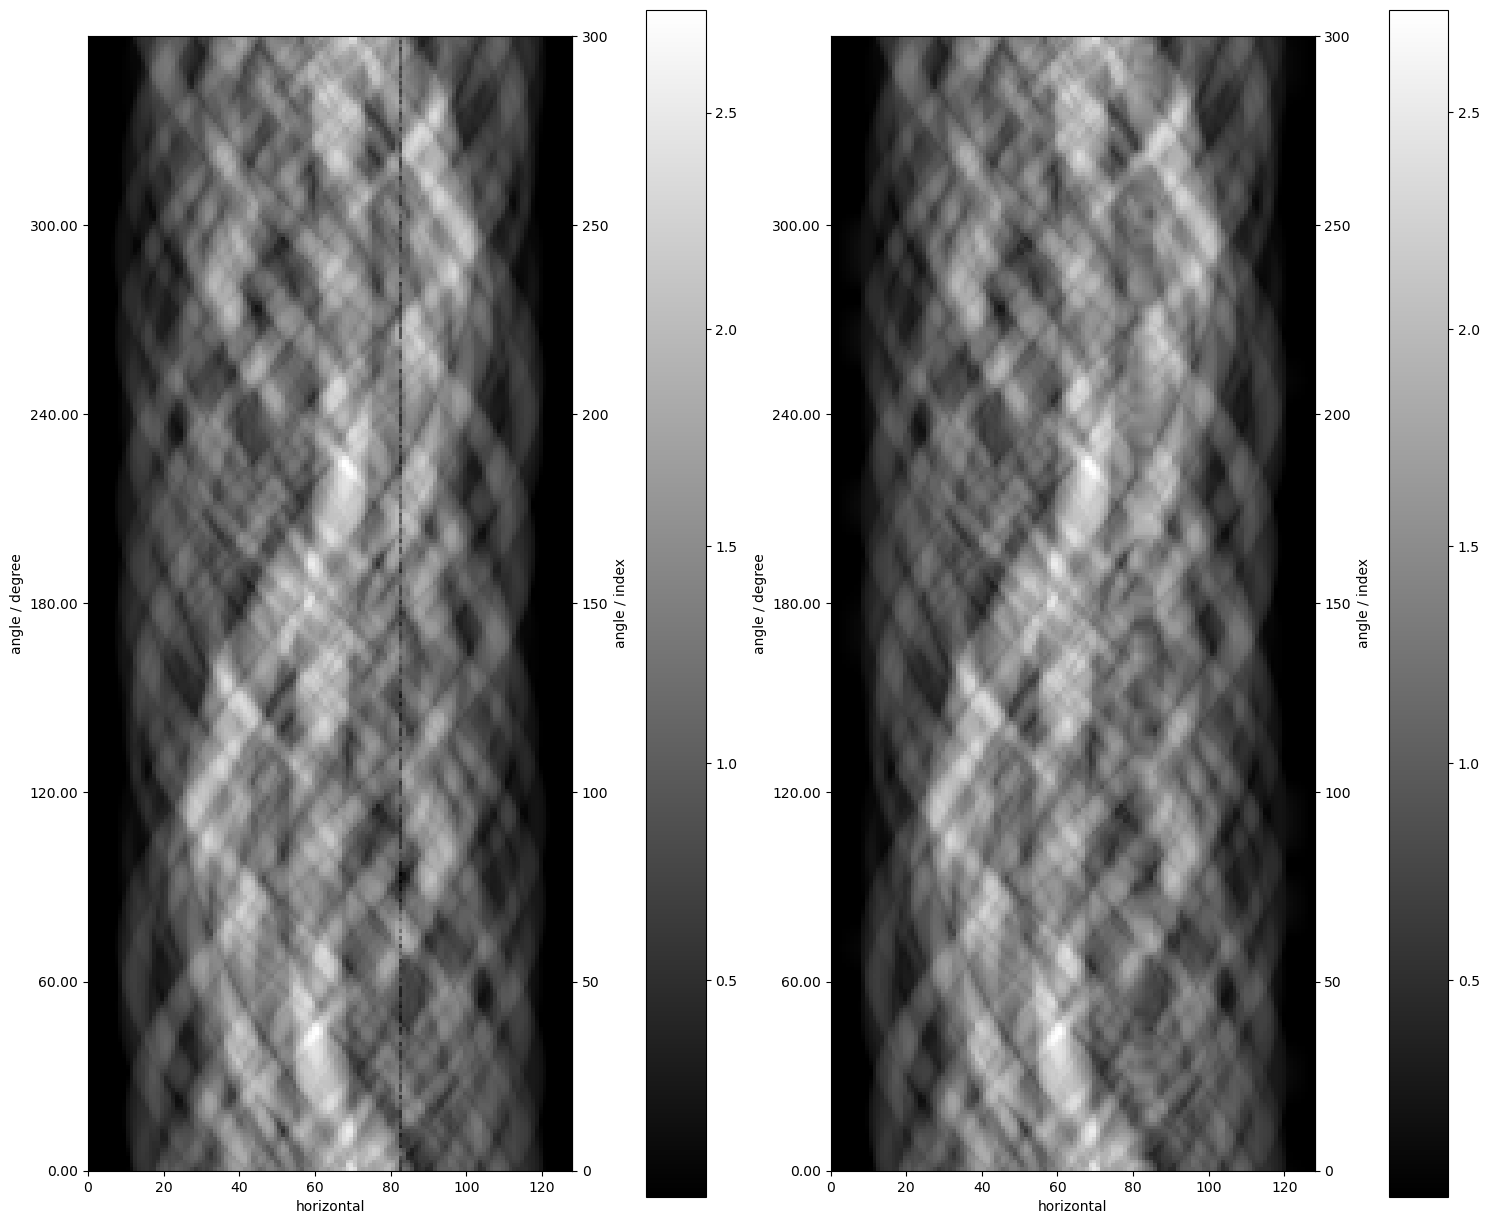

In [ ]:
data_at = rem.remove_all_stripe(data_corrupted.as_array(), 3.1, 5, 1)
# data_corrected.fill(data_at)
data_corrected = AcquisitionData(data_at, geometry=data_corrupted.geometry)
show2D([data_corrupted, data_corrected])

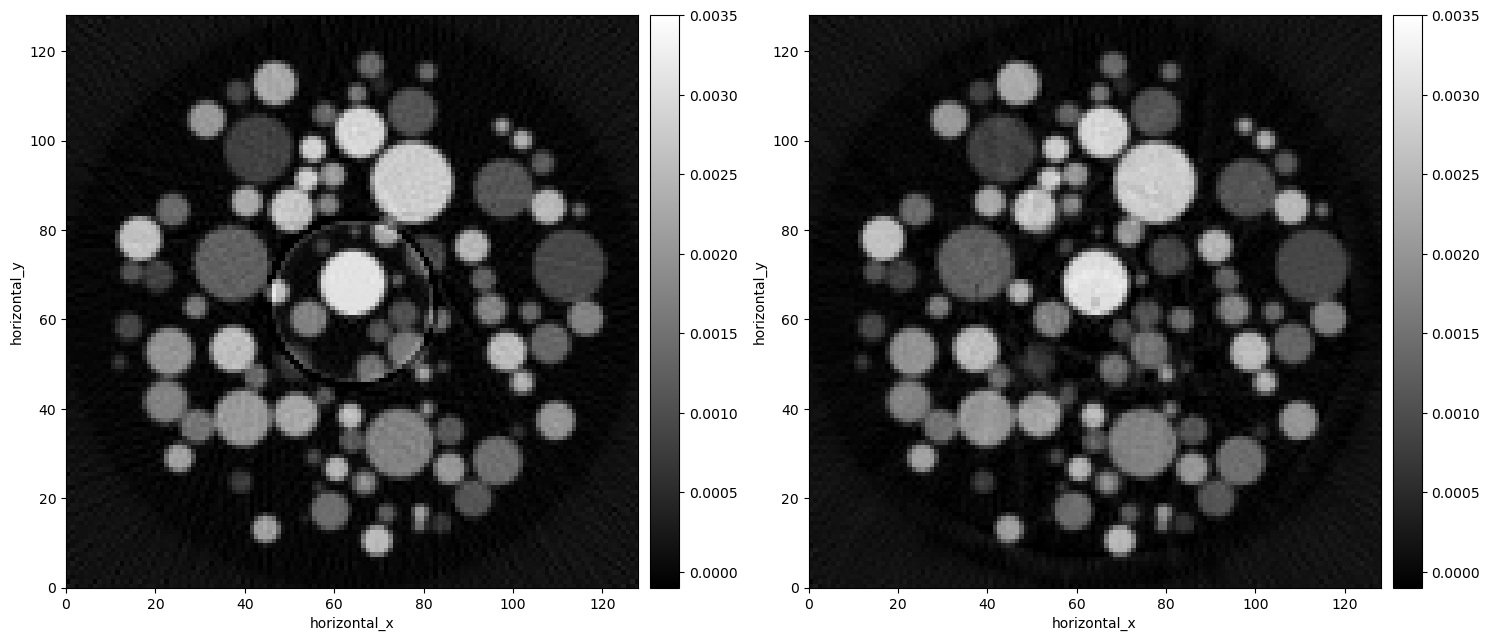

In [ ]:
fbp_recon_corrected = FBP(ig, ag, device='gpu')(data_corrected)
show2D([fbp_recon_corrupted, fbp_recon_corrected],num_cols=2,  cmap='grey', fix_range=(-0.0001,0.0035))


(300, 128)
(300, 128)
(300, 128)


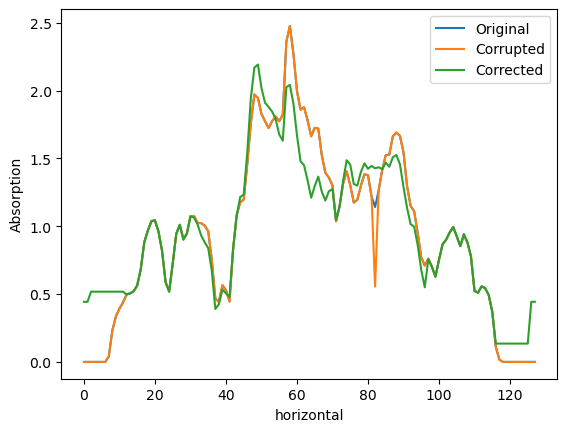

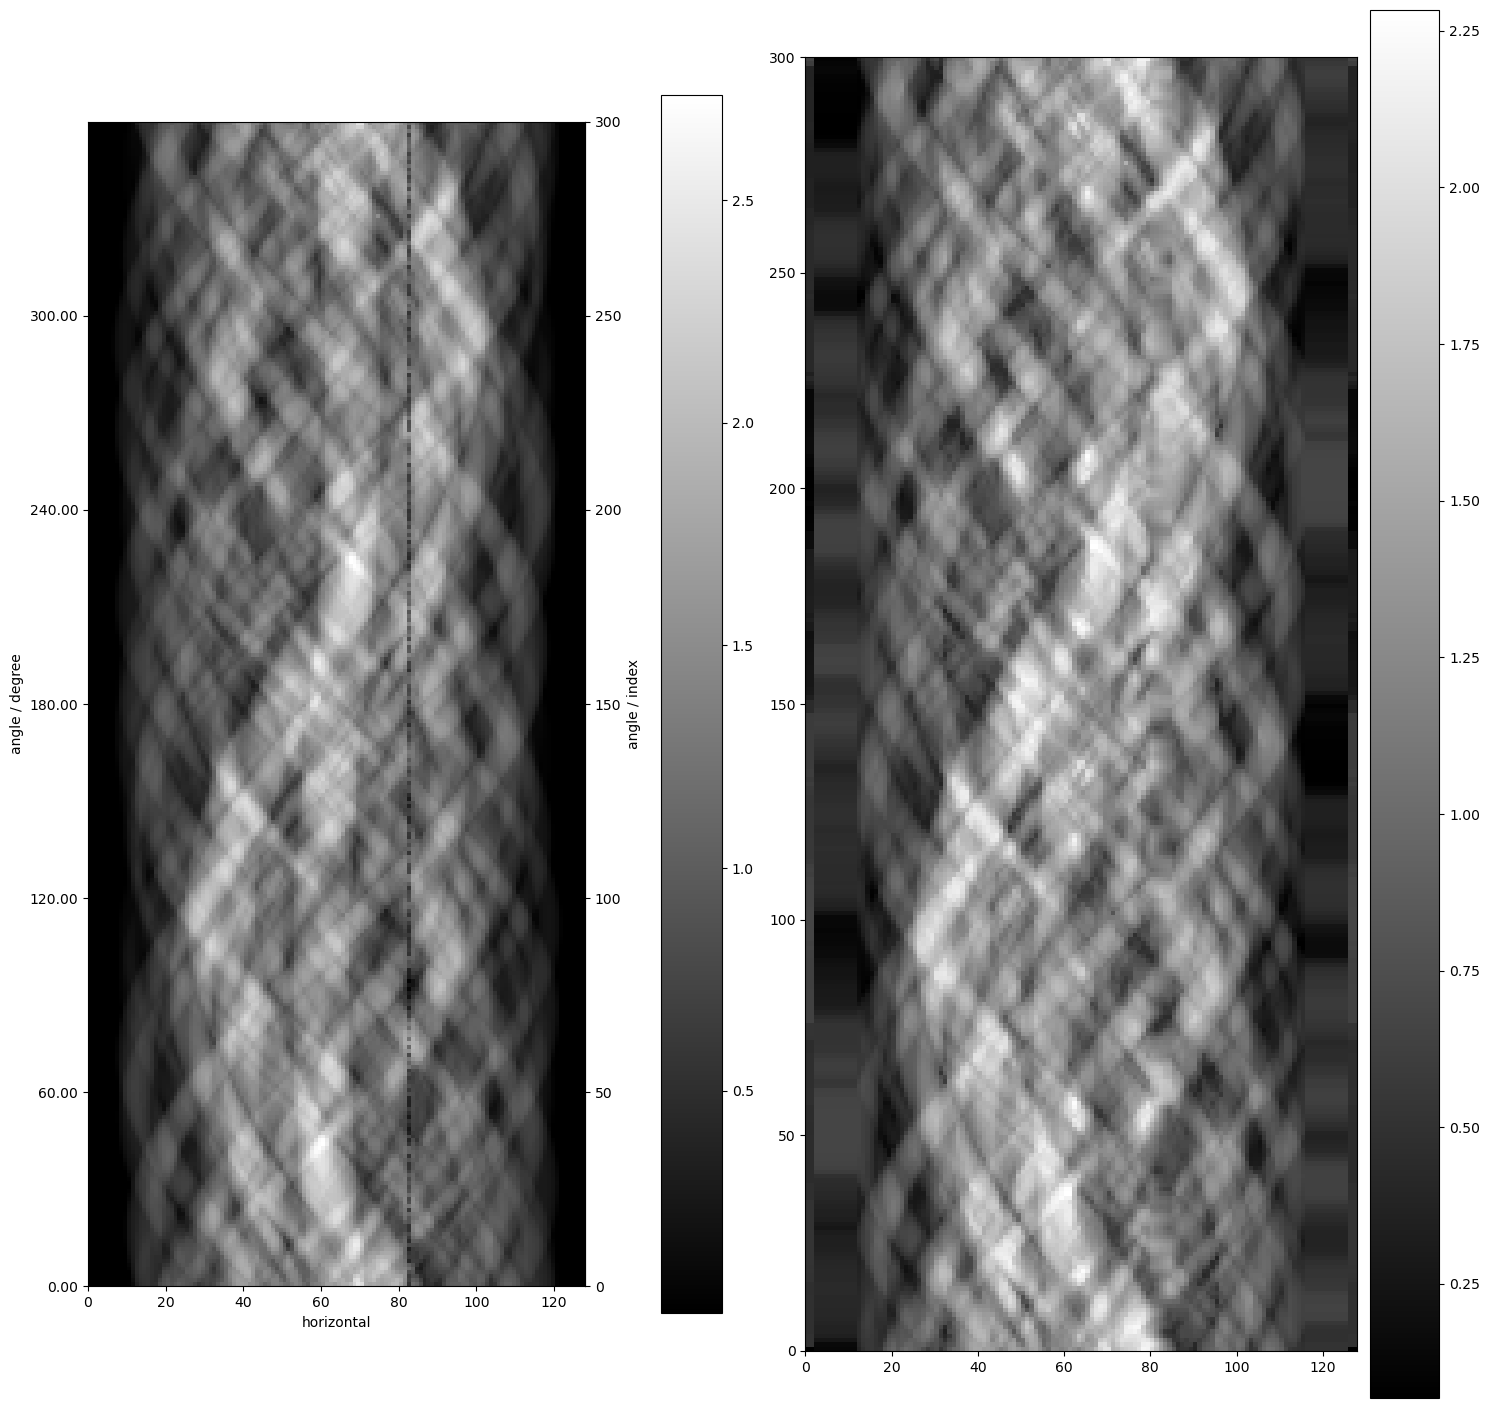

In [ ]:
data_corrected = rem.remove_all_stripe(data_corrupted.as_array(), snr=3.0, la_size=51, sm_size=21)

plt.figure()
ax = plt.gca()
ax.plot(data_slice.array[150,:])
ax.plot(data_corrupted.array[150,:])
ax.plot(data_corrected[150,:])
ax.legend(['Original','Corrupted','Corrected'])

ax.set_xlabel('horizontal')
ax.set_ylabel('Absorption')
print(numpy.shape(data_slice))
print(numpy.shape(data_corrupted))
print(numpy.shape(data_corrected))


show2D([data_corrupted, data_corrected])

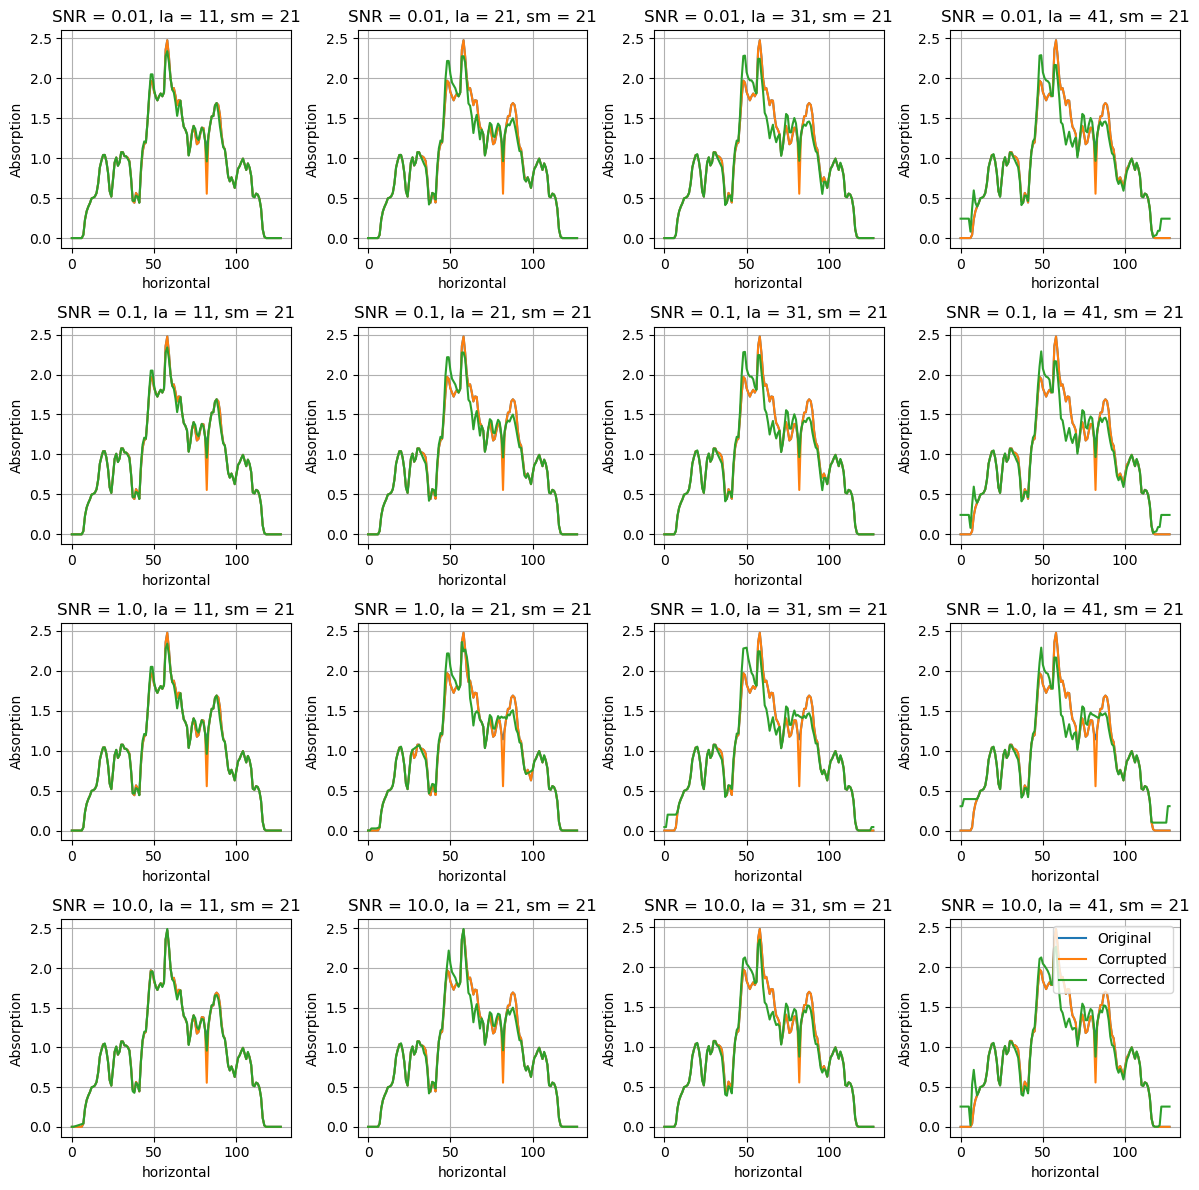

In [ ]:
fig, axs = plt.subplots(4,4, figsize=(12,12))

snrs = [0.01, 0.1, 1.0, 10.]
la_sizes = [11, 21, 31, 41]

for i in numpy.arange(len(snrs)):
    for j in numpy.arange(len(la_sizes)):

        data_corrected = rem.remove_all_stripe(data_corrupted.as_array(), snr=snrs[i], la_size=la_sizes[j], sm_size=1)
        # show2D([data_corrupted, data_corrected])
        ax = axs[i,j]
        ax.plot(data_slice.array[150,:])
        ax.plot(data_corrupted.array[150,:])
        ax.plot(data_corrected[150,:])
        
        ax.set_title('SNR = ' + str(snrs[i]) + ', la = ' + str(la_sizes[j]) + ', sm = 21' )
        ax.set_xlabel('horizontal')
        ax.set_ylabel('Absorption')
        ax.grid()
ax.legend(['Original','Corrupted','Corrected'])
plt.tight_layout()

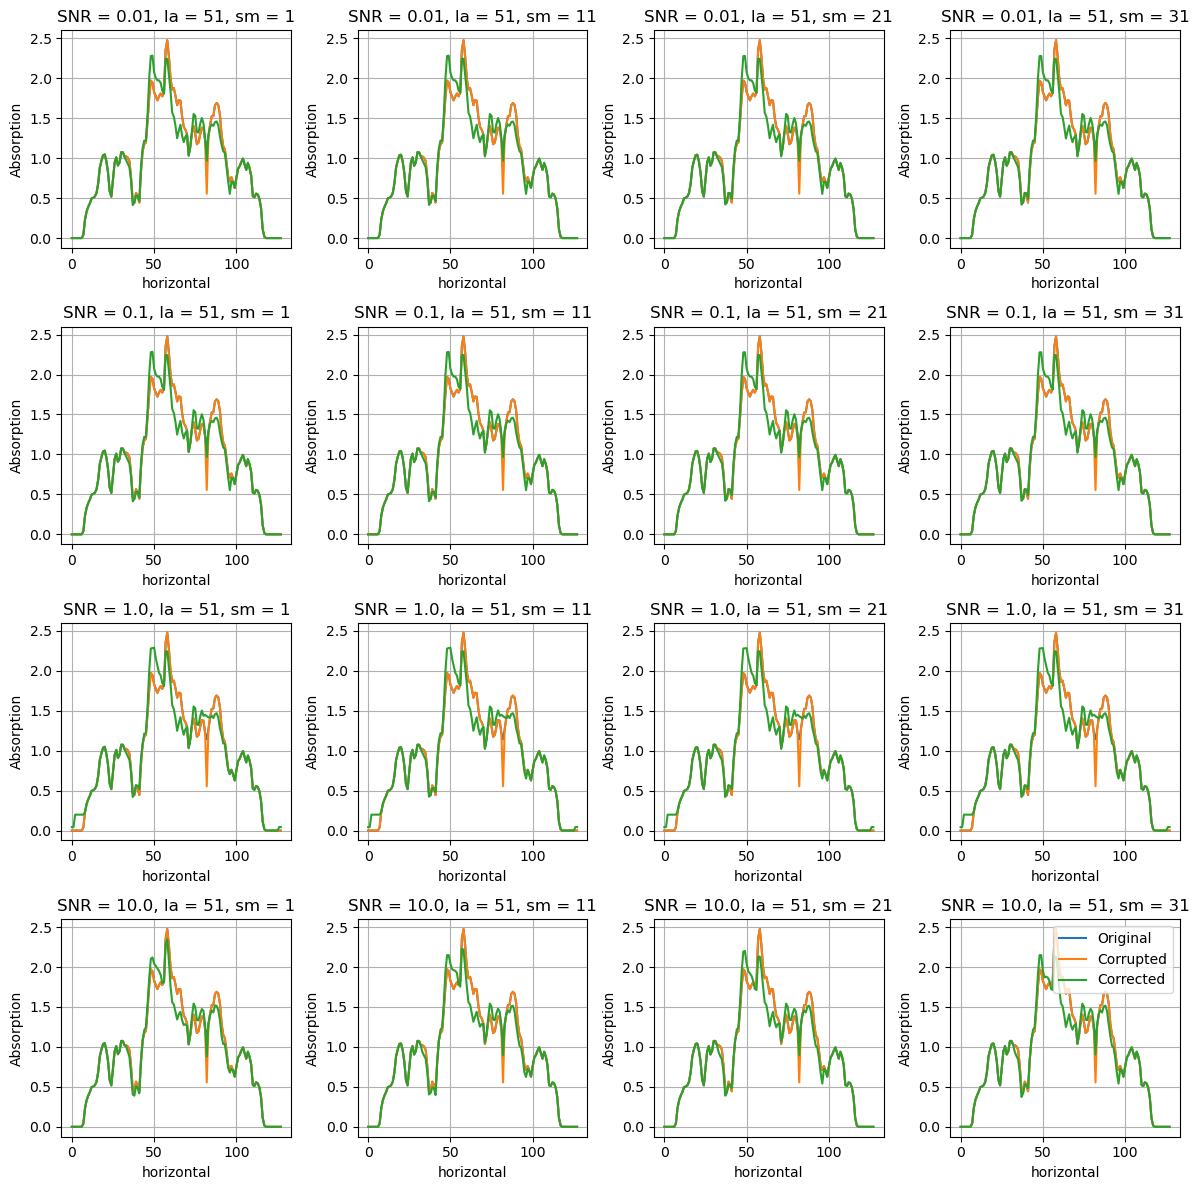

In [ ]:
fig, axs = plt.subplots(4,4, figsize=(12,12))

snrs = [0.01, 0.1, 1.0, 10.]
sm_sizes = [1, 11, 21, 31]

for i in numpy.arange(len(snrs)):
    for j in numpy.arange(len(sm_sizes)):

        data_corrected = rem.remove_all_stripe(data_corrupted.as_array(), snr=snrs[i], la_size=31, sm_size=sm_sizes[j])
        ax = axs[i,j]
        ax.plot(data_slice.array[150,:])
        ax.plot(data_corrupted.array[150,:])
        ax.plot(data_corrected[150,:])
        
        ax.set_title('SNR = ' + str(snrs[i]) + ', la = 51, sm = ' + str(sm_sizes[j]) )
        ax.set_xlabel('horizontal')
        ax.set_ylabel('Absorption')
        ax.grid()
ax.legend(['Original','Corrupted','Corrected'])
plt.tight_layout()

(300, 128)
(300, 128)
(300, 128)


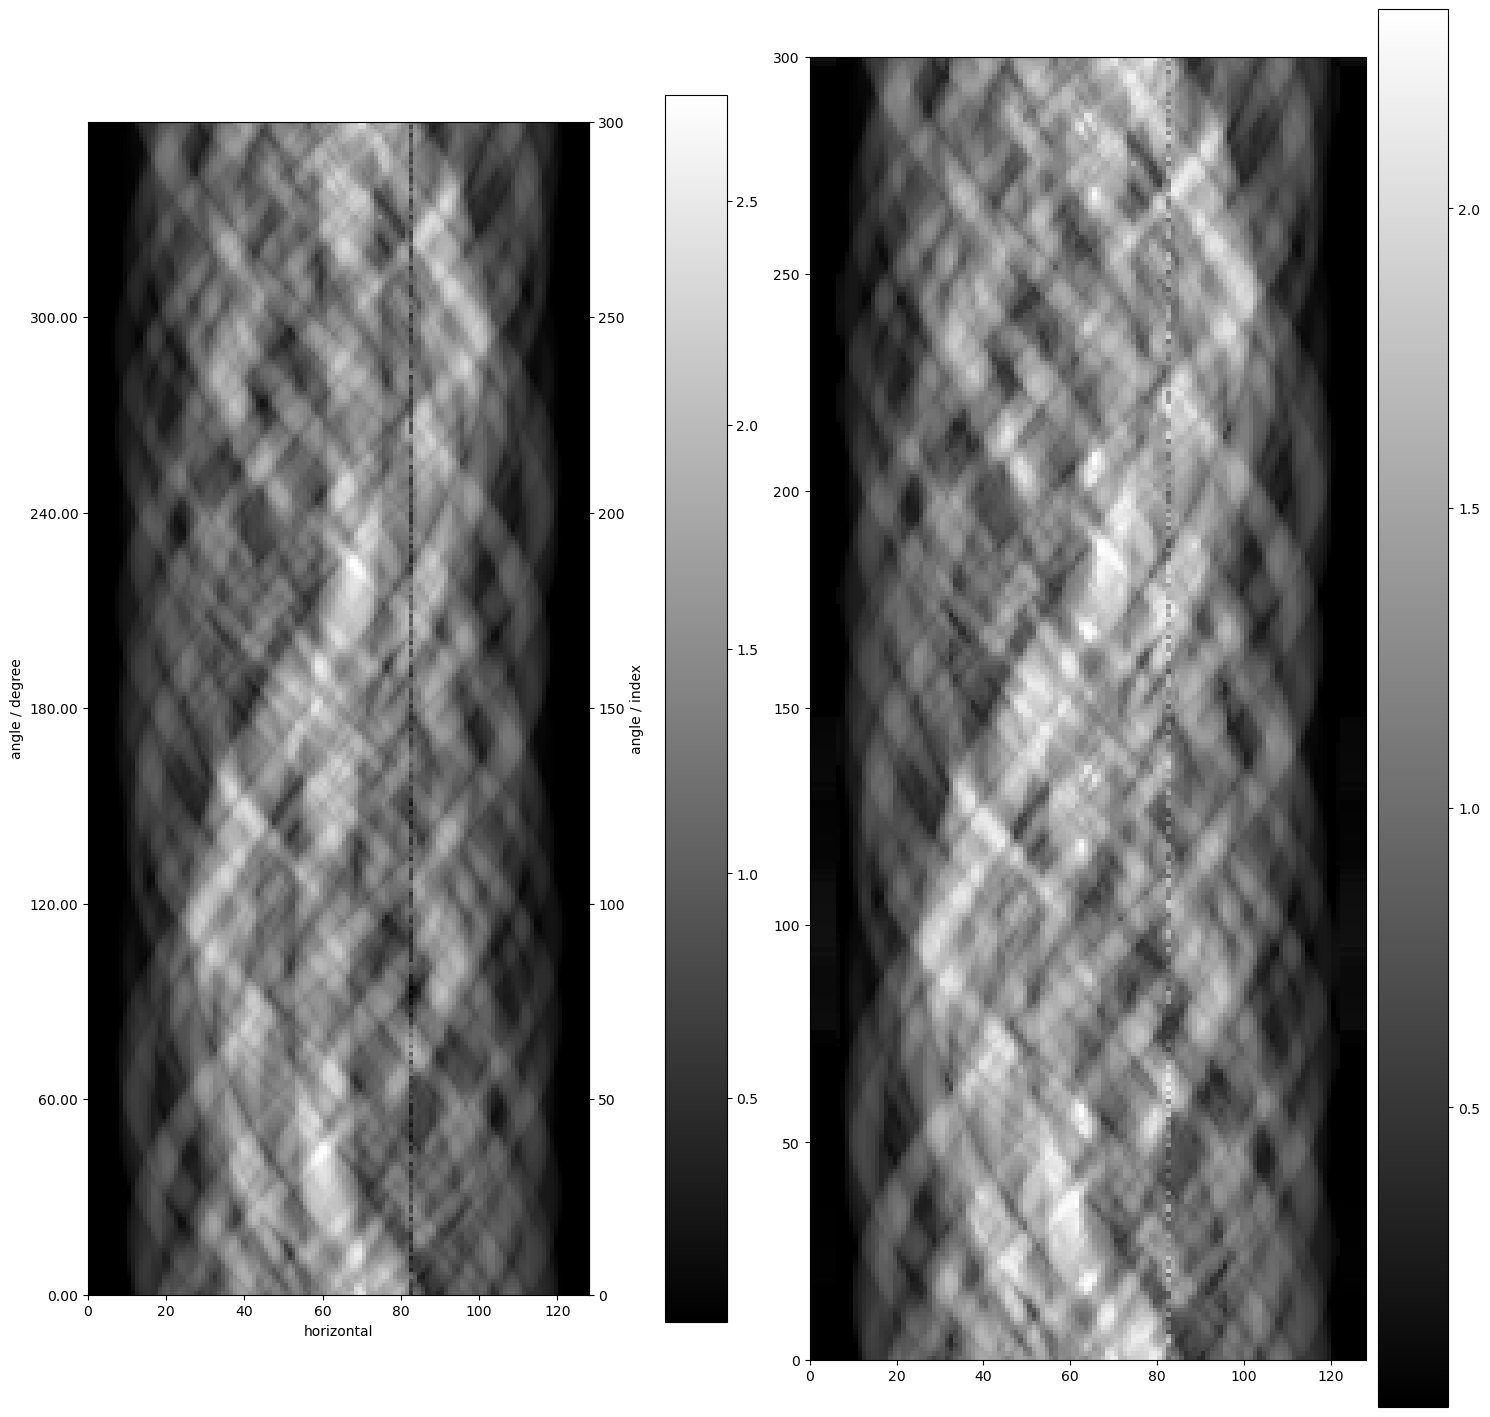

In [ ]:
ax.plot(data_slice.array[150,:])
ax.plot(data_corrupted.array[150,:])
ax.plot(data_corrected[150,:])
ax.legend(['Original','Corrupted','Corrected'])

ax.set_xlabel('horizontal')
ax.set_ylabel('Absorption')
print(numpy.shape(data_slice))
print(numpy.shape(data_corrupted))
print(numpy.shape(data_corrected))


show2D([data_corrupted, data_corrected])